# **Imports**

In [ ]:
# Preprocessing
import zipfile as zf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# Add your libraries here

# **Read in the data**

In [ ]:
# declare path variables
file_zip_path = "/content/dog-breeds-recognition.zip"
file_test_path = "/content/dog-breeds-recognition/testing.csv"
file_train_path = "/content/dog-breeds-recognition/training.csv"

In [ ]:
# unzip the file
with zf.ZipFile(file_zip_path) as zip:
  zip.extractall("/content")

In [ ]:
# read in train
df_train = pd.read_csv(file_train_path, header=None)
print(f"Are there any null values in Train: {df_train.isnull().values.any()}")
df_train

Are there any null values in Train: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
1,n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
2,n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
3,n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
4,n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
11996,n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
11997,n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376
11998,n02116738-African_hunting_dog\n02116738_9333.jpg,120,0.027123,0.675996,0.353758,0.421884,0.610241,0.311903,1.028679,0.632097,...,1.706490,0.396890,0.092548,1.995632,0.000000,1.191216,0.196342,0.957877,0.736384,0.034472


In [ ]:
# read in test
df_test = pd.read_csv(file_test_path, header=None)
print(f"Are there any null values in Test: {df_test.isnull().values.any()}")
df_test

Are there any null values in Test: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
1,n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
2,n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
3,n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
4,n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
8576,n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
8577,n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687
8578,n02116738-African_hunting_dog\n02116738_2988.jpg,120,0.249121,0.176359,2.857338,0.408916,0.582186,1.393884,2.366030,0.707135,...,0.592481,0.396963,0.142146,0.550736,0.031739,0.102475,2.250938,0.885802,1.031099,0.105213


# **Reformat Dataframe**
* The dataset doesnt come with column names, lets add some

In [ ]:
def reformat_df(df):
  df = df.rename(columns={0:"image_path", 1:"target"})
  for header in df.columns[2:]:
    new_header = f"feature_{header-1}"
    df.rename(columns={header:new_header}, inplace=True)
  df = df.set_index("image_path")
  return df

In [ ]:
df_train = reformat_df(df_train)
df_train

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,0.677149,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,1.767242,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,1.124645,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,0.154945,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,1.155066,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,1.145573,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,0.191504,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,1.760209,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376


In [ ]:
df_test = reformat_df(df_test)
df_test

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,0.597607,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,1.062587,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,1.756382,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,0.913266,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,1.323611,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,0.469749,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,1.963169,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,0.408895,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687


# **Create train/validaton/test spilits**
* From the training set, we will create a small validation set which is going to be used to find the best Hyperparamter for the models.
* We cant use the test set because that will lead to something called model leakage!!!

In [ ]:
# train features
X = df_train.iloc[:,1:]
# train labels
y = df_train.iloc[:,0]

# create the training & validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.15, shuffle=True, random_state=7)

# re-assign the test set variables for consistency & shuffle
df_test = df_test.sample(frac = 1)
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [ ]:
print(f"Training Data: {X_train.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data: {X_valid.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data: {X_test.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data: (10200, 512)
Training Labels: (10200,)
Validation Data: (1800, 512)
Validation Labels: (1800,)
Testing Data: (8580, 512)
Testing Labels: (8580,)


# **Preprocessing**
* Training & Validation datasets will be Normalised
* Most ML models expect the class values to start from zero to n. Our targets start from one to n, hence we need to fix this up.
* PCA will be used to create a seccondary dataset which you will use to experimerent to see if reducing the attributes will lead to better classification results

## 1) **Normalize values**


In [ ]:
# intitilize the StandardScaler
stdsclr = StandardScaler()
# fit it to the trainset ONLY
stdsclr.fit(X_train)
# Apply it to Train data
X_train_sclr = stdsclr.transform(X_train)
# Apply it to Valid data
X_valid_sclr = stdsclr.transform(X_valid)

In [ ]:
print(f"Train Data Scaled: {X_train_sclr.shape}")
print(f"Validation Data Scaled: {X_valid_sclr.shape}")

Train Data Scaled: (10200, 512)
Validation Data Scaled: (1800, 512)


## **2) Rebase target classes**
* subtract 1 from all target labels to shift the range from 0 to 119 instead of 1 to 120

In [ ]:
y_train = y_train - 1
y_valid = y_valid - 1
y_test = y_test - 1

In [ ]:
y_train.value_counts().sort_index()

target
0      84
1      84
2      93
3      89
4      90
       ..
115    84
116    85
117    86
118    82
119    79
Name: count, Length: 120, dtype: int64

## **3) PCA**
* A secondary dataset used for a experiment

In [ ]:
# create PCA to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training dataset
pca.fit(X_train_sclr)

# Transform the training, validation, and test datasets
X_train_pca = pca.transform(X_train_sclr)
X_valid_pca = pca.transform(X_valid_sclr)
X_test_pca = pca.transform(X_test)

# Output the results
print("Transformed training set shape:", X_train_pca.shape)
print("Transformed validation set shape:", X_valid_pca.shape)
print("Transformed test set shape:", X_test_pca.shape)

Transformed training set shape: (10200, 256)
Transformed validation set shape: (1800, 256)
Transformed test set shape: (8580, 256)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
print(f"Training Data PCA: {X_train_pca.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data PCA: {X_valid_pca.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data PCA: {X_test_pca.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data PCA: (10200, 256)
Training Labels: (10200,)
Validation Data PCA: (1800, 256)
Validation Labels: (1800,)
Testing Data PCA: (8580, 256)
Testing Labels: (8580,)


# **Feature Selection**
* There are two popular feature selection techniques that can be used for numerical input data and a categorical (class) target variable.
* 1) **ANOVA-f Statistic** --> determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups
  * **Null Hypothesis (H0)**: The group means are equal.
  * **Alternative Hypothesis (H1)**: At least one group mean is different.
  * The F statistic is calculated as the ratio of the variance between the group means to the variance within the groups.
  * A higher F value indicates a greater variability between groups compared to within groups, which can lead to the rejection of the null hypothesis.
  * assumes normality of residuals and homogeneity of variances
* 2) **Mutual Information Statistics** --> measures how much information the presence/absence of one variable tells you about the presence/absence of another, thereby giving a measure of the variables' mutual dependence.
  * Value: It can range from 0 to positive infinity. A mutual information of 0 indicates that the variables are independent.
  * Mutual Information makes no assumptions about the distribution of data.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [ ]:
def feature_section(train,valid,test, stat,k):
  fs = SelectKBest(score_func=stat, k=k)
  fs.fit(X_train_pca, y_train)
  train_fs = fs.transform(train)
  valid_fs = fs.transform(valid)
  test_fs = fs.transform(test)
  return train_fs, valid_fs, test_fs, fs

def display_fs(fs):
  plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
  plt.show()

## **ANOVA-f Statistic**

In [ ]:
_,_,_,ftest = feature_section(X_train_pca, X_valid_pca, X_test_pca, f_classif, "all")
_,_,_,mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, "all")

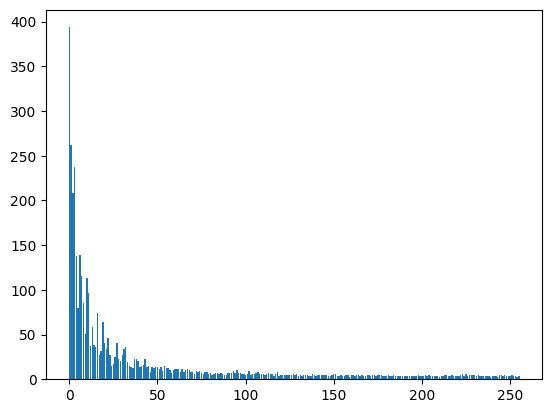

In [ ]:
display_fs(ftest)

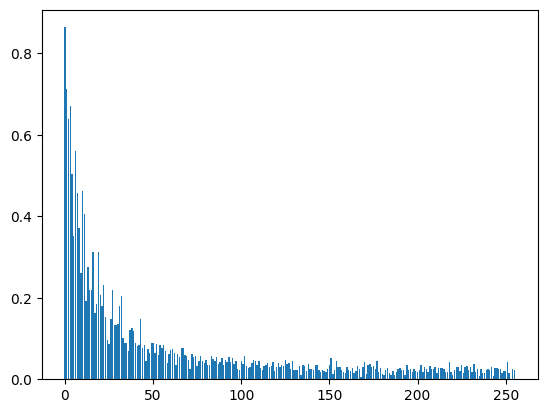

In [ ]:
display_fs(mutalinfo)

# **Display Data Variables**

In [ ]:
retriever, terrier, spaniel, hound

In [ ]:
data['breed_name'] = data['image_path'].str.extract(r'n\d+-([A-Za-z_\-]+)\\')


In [ ]:
def classify_dog_size(breed):
    # Defining breed size categories based on common knowledge
    small_breeds = ["Chihuahua", "Shih-Tzu", "Maltese_dog", "Papillon", "Toy_terrier", "Japanese_spaniel", "Pekinese",
                    "Yorkshire_terrier", "Dandie_Dinmont", "Lhasa", "Pomeranian", "Toy_poodle", "affenpinscher", "basenji", "pug"]
    medium_breeds = ["beagle", "Cocker_spaniel", "English_springer", "Bulldog", "French_bulldog", "Basset", "Brittany_spaniel",
                     "Staffordshire_bullterrier", "American_Staffordshire_terrier", "Border_collie", "Bulldog"]
    large_breeds = ["Labrador_retriever", "Golden_retriever", "German_shepherd", "Boxer", "Doberman", "Rottweiler",
                    "Siberian_husky", "Dalmatian", "Afghan_hound", "Irish_setter"]
    giant_breeds = ["Great_Dane", "Mastiff", "Saint_Bernard", "Newfoundland", "Bernese_mountain_dog", "Great_Pyrenees"]

    if breed in small_breeds:
        return "small"
    elif breed in medium_breeds:
        return "medium"
    elif breed in large_breeds:
        return "large"
    elif breed in giant_breeds:
        return "giant"
    else:
        return "unknown"  # For breeds not explicitly listed

# Apply the function to the dataset
data['dog_size'] = data['breed_name'].apply(classify_dog_size)


## **Dataset 1 - all features**

In [ ]:
# train
X_train_sclr
y_train
# validation
X_valid_sclr
y_valid
# test
X_test
y_test

image_path
n02088238-basset\n02088238_9718.jpg                10
n02099601-golden_retriever\n02099601_6318.jpg      56
n02096051-Airedale\n02096051_7602.jpg              40
n02112018-Pomeranian\n02112018_692.jpg            107
n02091134-whippet\n02091134_6057.jpg               21
                                                 ... 
n02113712-miniature_poodle\n02113712_3300.jpg     114
n02104365-schipperke\n02104365_7859.jpg            72
n02085936-Maltese_dog\n02085936_5202.jpg            2
n02100735-English_setter\n02100735_10211.jpg       61
n02094433-Yorkshire_terrier\n02094433_8580.jpg     36
Name: target, Length: 8580, dtype: int64

## **Dataset 2 - PCA**

In [ ]:
# Dataset 2 - PCA
# train
X_train_pca
y_train
# validation
X_valid_pca
y_valid
# test
X_test_pca
y_test

image_path
n02088238-basset\n02088238_9718.jpg                10
n02099601-golden_retriever\n02099601_6318.jpg      56
n02096051-Airedale\n02096051_7602.jpg              40
n02112018-Pomeranian\n02112018_692.jpg            107
n02091134-whippet\n02091134_6057.jpg               21
                                                 ... 
n02113712-miniature_poodle\n02113712_3300.jpg     114
n02104365-schipperke\n02104365_7859.jpg            72
n02085936-Maltese_dog\n02085936_5202.jpg            2
n02100735-English_setter\n02100735_10211.jpg       61
n02094433-Yorkshire_terrier\n02094433_8580.jpg     36
Name: target, Length: 8580, dtype: int64

### **Dataset 3 - PCA & Feature Selection**
* Please run this three times with different values of k.
  * k = 50
  * k = 100
  * k = 150
  * k = 200
* see which set gets the highest on the validation set

In [ ]:
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, 100)

In [ ]:
# Dataset 3 - PCA & Feature Selection
# train
X_train_pca_fs
y_train
# validation
X_valid_pca_fs
y_valid
# test
X_test_pca_fs
y_test

image_path
n02093859-Kerry_blue_terrier\n02093859_3310.jpg          32
n02110806-basenji\n02110806_3995.jpg                    101
n02110958-pug\n02110958_16433.jpg                       102
n02086646-Blenheim_spaniel\n02086646_416.jpg              5
n02113624-toy_poodle\n02113624_5459.jpg                 113
                                                       ... 
n02112018-Pomeranian\n02112018_2277.jpg                 107
n02093859-Kerry_blue_terrier\n02093859_781.jpg           32
n02085782-Japanese_spaniel\n02085782_622.jpg              1
n02094258-Norwich_terrier\n02094258_366.jpg              35
n02099849-Chesapeake_Bay_retriever\n02099849_110.jpg     58
Name: target, Length: 8580, dtype: int64

In [ ]:
import xgboost as xgb

In [ ]:
eval_set = [(X_train_pca_fs, y_train), (X_valid_pca_fs, y_valid)]

clf = xgb.XGBClassifier(n_estimators=1000,max_depth=8, early_stopping_rounds=30, objective="multi:softmax")
clf.fit(X_train_pca_fs,y_train, eval_metric="merror", eval_set=eval_set)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.48520	validation_1-merror:0.65000
[1]	validation_0-merror:0.33157	validation_1-merror:0.60722
[2]	validation_0-merror:0.21745	validation_1-merror:0.58111
[3]	validation_0-merror:0.14451	validation_1-merror:0.55722
[4]	validation_0-merror:0.09265	validation_1-merror:0.53889
[5]	validation_0-merror:0.06392	validation_1-merror:0.52389
[6]	validation_0-merror:0.04265	validation_1-merror:0.51611
[7]	validation_0-merror:0.03000	validation_1-merror:0.50556
[8]	validation_0-merror:0.01902	validation_1-merror:0.49500
[9]	validation_0-merror:0.01088	validation_1-merror:0.48500
[10]	validation_0-merror:0.00647	validation_1-merror:0.48222
[11]	validation_0-merror:0.00392	validation_1-merror:0.46944
[12]	validation_0-merror:0.00304	validation_1-merror:0.46611
[13]	validation_0-merror:0.00245	validation_1-merror:0.46222
[14]	validation_0-merror:0.00216	validation_1-merror:0.45500
[15]	validation_0-merror:0.00176	validation_1-merror:0.44833
[16]	validation_0-merror:0.00147	v

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

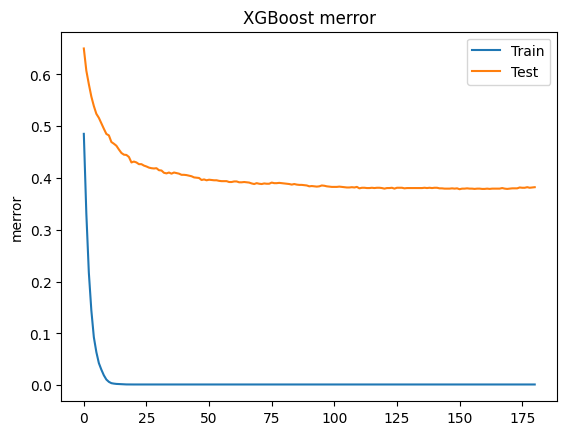

In [ ]:

# retrieve performance metrics
results = clf.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('XGBoost merror')
plt.show()

In [ ]:
predictions = clf.predict(X_test_pca_fs)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.3537296037296037


In [ ]:
y_test

image_path
n02093859-Kerry_blue_terrier\n02093859_3310.jpg          32
n02110806-basenji\n02110806_3995.jpg                    101
n02110958-pug\n02110958_16433.jpg                       102
n02086646-Blenheim_spaniel\n02086646_416.jpg              5
n02113624-toy_poodle\n02113624_5459.jpg                 113
                                                       ... 
n02112018-Pomeranian\n02112018_2277.jpg                 107
n02093859-Kerry_blue_terrier\n02093859_781.jpg           32
n02085782-Japanese_spaniel\n02085782_622.jpg              1
n02094258-Norwich_terrier\n02094258_366.jpg              35
n02099849-Chesapeake_Bay_retriever\n02099849_110.jpg     58
Name: target, Length: 8580, dtype: int64

In [ ]:
predictions

array([ 32,  20, 104, ...,   9,  33, 102], dtype=int32)